In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft, fftfreq
import time
from scipy.signal import fftconvolve
import audio2numpy as a2n


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


**1.** Реализовать вейвлет Морле во временном пространстве ψ(t), формула (1).

Реализовать вейвлет Морле в частотном пространстве ψ(ω). Это можно сделать
используя обратное преобразование Фурье от ψ(t) или воспользоваться формулой (2).
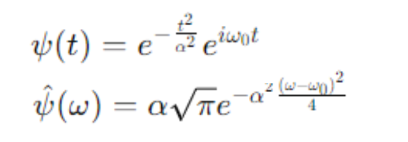

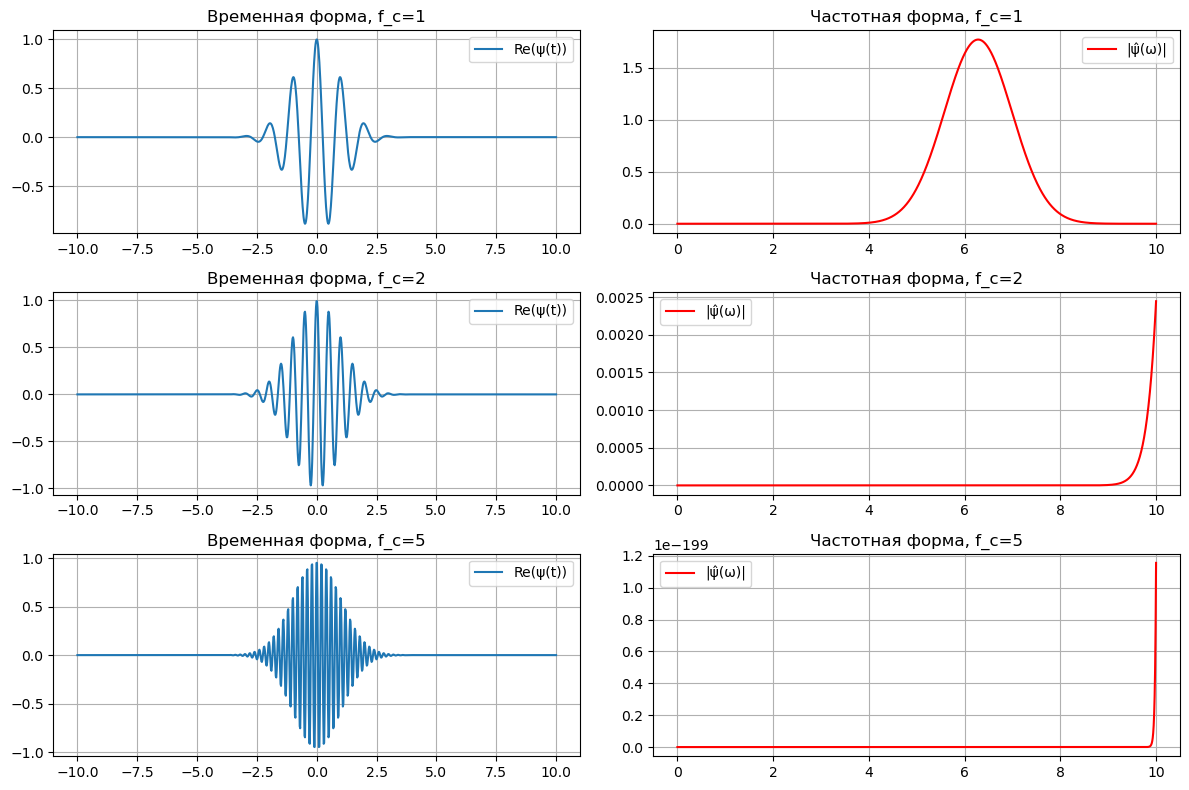

In [3]:
def morlet_wavelet(t, f_c, sigma=1.0):
    return np.exp(-t**2 / (2 * sigma**2)) * np.exp(1j * 2 * np.pi * f_c * t)

def morlet_wavelet_freq(w, f_c):
    alpha = 1
    sigma = 1
    return alpha * np.sqrt(np.pi) * np.exp(-sigma**2 * (w - 2 * np.pi * f_c)**2)

t = np.linspace(-10, 10, 1000)
w = np.linspace(0, 10, 1000)
frequencies = [1, 2, 5]

fig, axes = plt.subplots(len(frequencies), 2, figsize=(12, 8))

for i, f_c in enumerate(frequencies):
    psi_t = morlet_wavelet(t, f_c)

    psi_w = morlet_wavelet_freq(w, f_c)

    axes[i, 0].plot(t, psi_t.real, label='Re(ψ(t))')
    axes[i, 0].set_title(f'Временная форма, f_c={f_c}')
    axes[i, 0].legend()
    axes[i, 0].grid()

    axes[i, 1].plot(w, np.abs(psi_w), label='|ψ̂(ω)|', color='red')
    axes[i, 1].set_title(f'Частотная форма, f_c={f_c}')
    axes[i, 1].legend()
    axes[i, 1].grid()

plt.tight_layout()
plt.show()


**2.** Реализовать вейвлет “Мексиканская шляпа” во временном пространстве ψ(t).

Реализовать вейвлет “Мексиканская шляпа” в частотном пространстве ψ(ω). Это
можно сделать используя обратное преобразование Фурье от ψ(t) или воспользоваться
формулой (4). 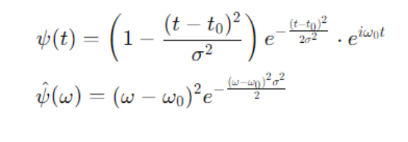

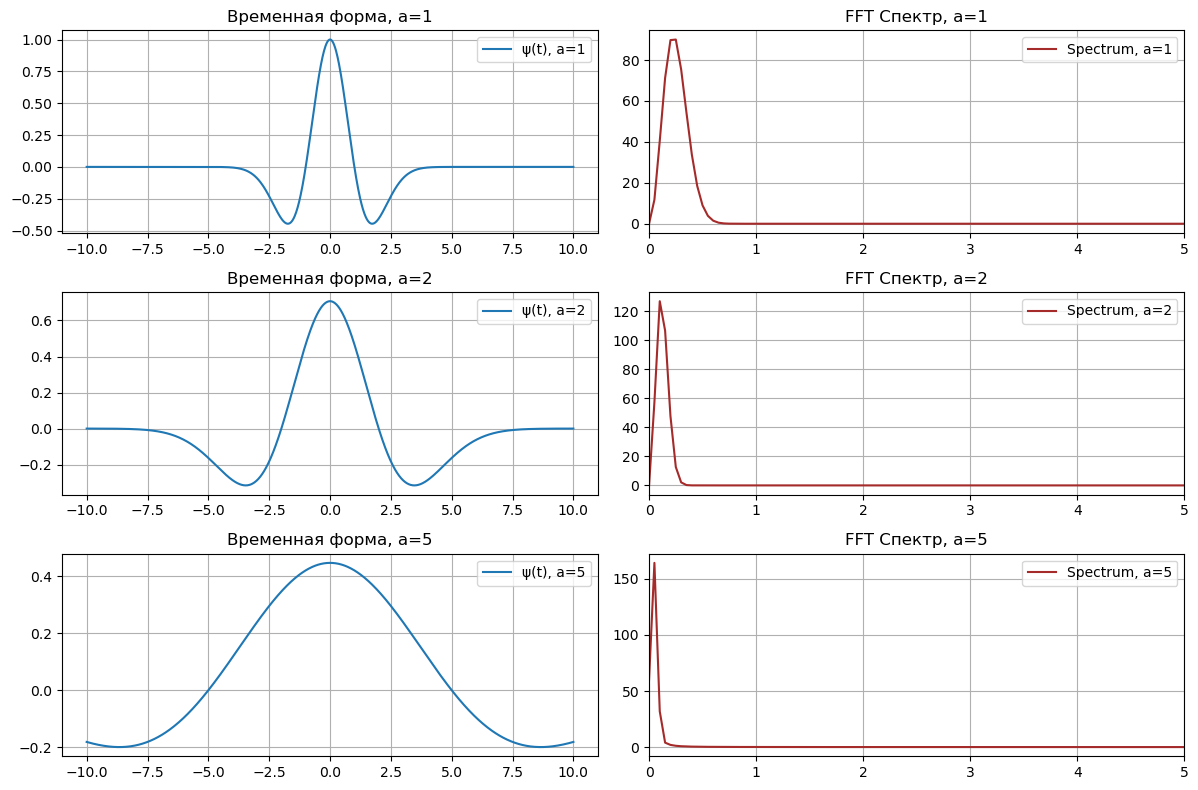

In [4]:
def mexican_hat_wavelet(t, sigma=1):
    return (1 - (t / sigma)**2) * np.exp(-t**2 / (2 * sigma**2))

def mexican_hat_wavelet_freq(w, sigma=1):
    return sigma**3 * w**2 * np.exp(-0.5 * (sigma * w)**2)

def scaled_mexican_hat_wavelet(t, sigma, a):
    return 1 / np.sqrt(a) * mexican_hat_wavelet(t / a, sigma)

def scaled_mexican_hat_wavelet_freq(w, sigma, a):
    return np.sqrt(a) * mexican_hat_wavelet_freq(a * w, sigma)

t = np.linspace(-10, 10, 1000)
w = np.linspace(0, 5, 1000)
scales = [1, 2, 5]

fig, axes = plt.subplots(len(scales), 2, figsize=(12, 8))

for i, a in enumerate(scales):
    psi_t_scaled = scaled_mexican_hat_wavelet(t, sigma=1, a=a)
    psi_w_scaled = scaled_mexican_hat_wavelet_freq(w, sigma=1, a=a)
    fft_spectrum = np.abs(np.fft.fft(psi_t_scaled))
    freqs = np.fft.fftfreq(len(psi_t_scaled), d=(t[1] - t[0]))

    axes[i, 0].plot(t, psi_t_scaled, label=f'ψ(t), a={a}')
    axes[i, 0].set_title(f'Временная форма, a={a}')
    axes[i, 0].legend()
    axes[i, 0].grid()

    axes[i, 1].plot(freqs[:len(freqs)//2], fft_spectrum[:len(freqs)//2], label=f'Spectrum, a={a}', color='brown')
    axes[i, 1].set_xlim(0, 5)
    axes[i, 1].set_title(f'FFT Спектр, a={a}')
    axes[i, 1].legend()
    axes[i, 1].grid()

plt.tight_layout()
plt.show()


**3.** Реализовать вейвлет Хаара во временном пространстве ψ(t). Вейвлет состоит из двух
прямоугольных импульсов положительного для интервала 0 ≤ t < 0.5 и отрицательного для
интервала 0.5 ≤ t < 1 и может быть представлен согласно формуле (5).
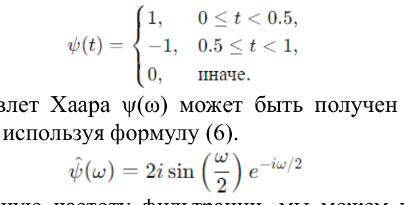

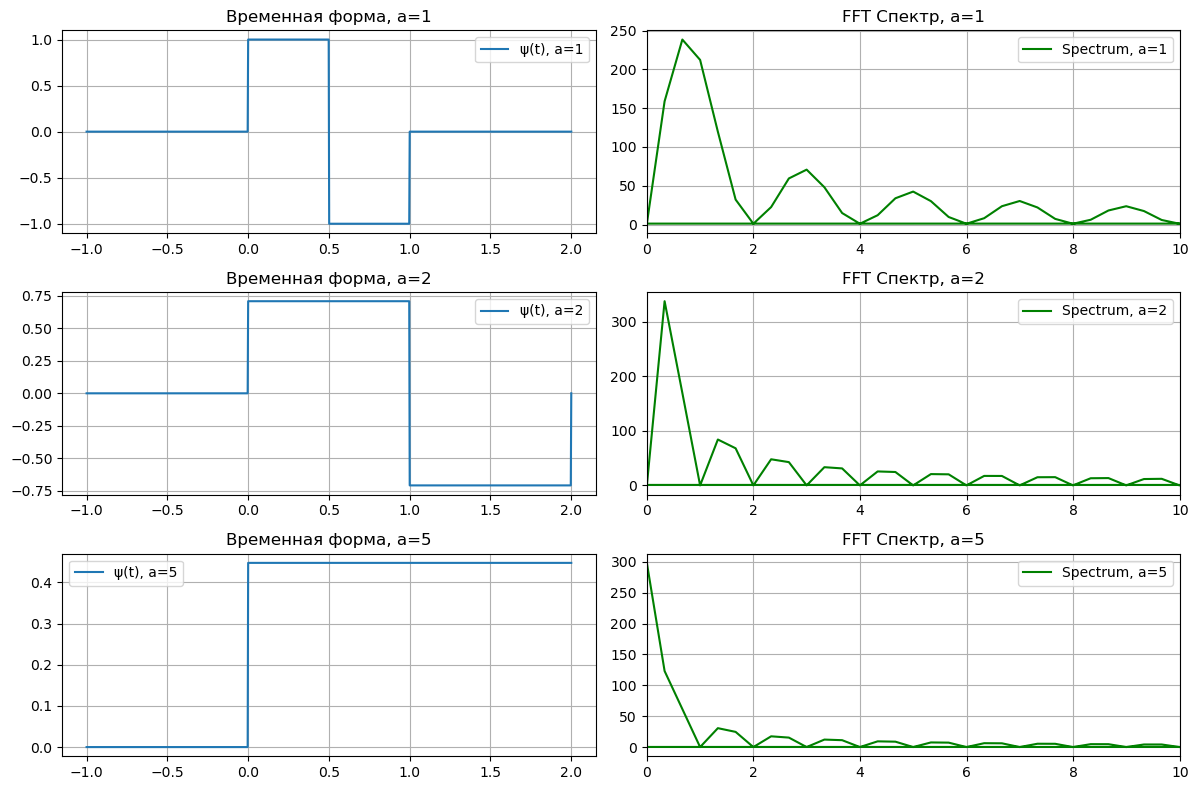

In [5]:
def haar_wavelet(t):
    return np.where((0 <= t) & (t < 0.5), 1,
           np.where((0.5 <= t) & (t < 1), -1, 0))

def haar_wavelet_freq(w):
    return 2j * np.sin(w / 2) * np.exp(-1j * w / 2)

def haar_wavelet_scaled(t, a):
    return 1 / np.sqrt(a) * haar_wavelet(t / a)

def haar_wavelet_freq_scaled(w, a):
    return np.sqrt(a) * haar_wavelet_freq(a * w)

t = np.linspace(-1, 2, 1000)
w = np.linspace(0, 10, 1000)
scales = [1, 2, 5]

fig, axes = plt.subplots(len(scales), 2, figsize=(12, 8))

for i, a in enumerate(scales):
    psi_t_scaled = haar_wavelet_scaled(t, a)
    psi_w_scaled = haar_wavelet_freq_scaled(w, a)
    fft_spectrum = np.abs(np.fft.fft(psi_t_scaled))
    freqs = np.fft.fftfreq(len(psi_t_scaled), d=(t[1] - t[0]))

    axes[i, 0].plot(t, psi_t_scaled, label=f'ψ(t), a={a}')
    axes[i, 0].set_title(f'Временная форма, a={a}')
    axes[i, 0].legend()
    axes[i, 0].grid()

    axes[i, 1].plot(freqs, fft_spectrum, label=f'Spectrum, a={a}', color='green')
    axes[i, 1].set_xlim(0, 10)
    axes[i, 1].set_title(f'FFT Спектр, a={a}')
    axes[i, 1].legend()
    axes[i, 1].grid()

plt.tight_layout()
plt.show()


**4.** Рассмотреть произвольный сигнал с шумом.

Реализовать свертку сигнала с вейвлетами Морле, вейвлетом “Мексиканская шляпа” и
вейвлетом Хаара.

Осуществить фильтрацию сигналов с помощью этих 3-х вейвлетов.

Сравнить результаты.

Отметить сильные и слабые стороны каждого из вейвлетов.

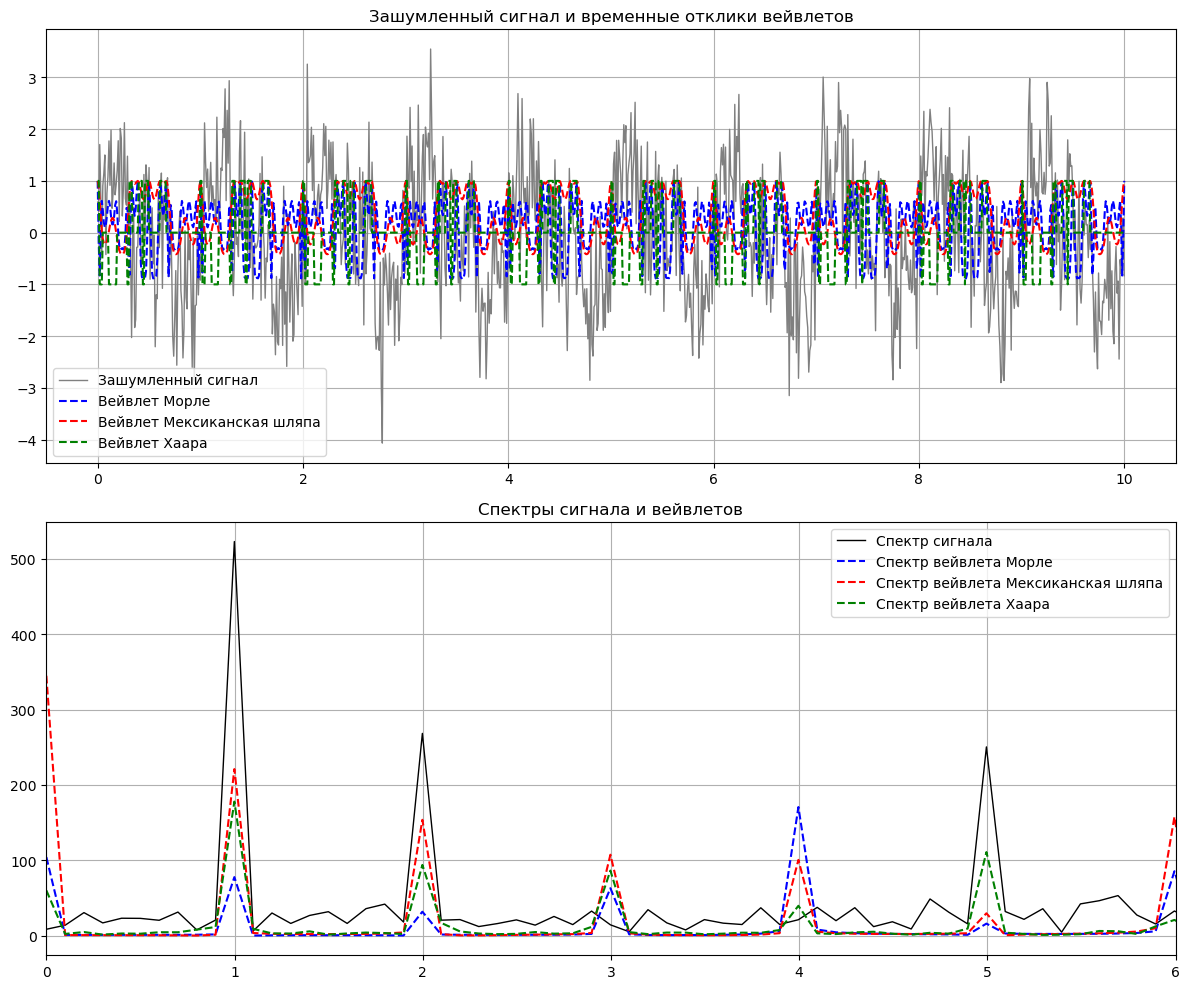

In [7]:
t = np.linspace(0, 10, 1000)
signal = np.sin(2 * np.pi * t) + 0.5 * np.sin(2 * np.pi * 2 * t) + 0.5 * np.sin(2* np.pi * 5 * t)
noise = 0.8 * np.random.normal(size=len(t))
noisy_signal = signal + noise

num = 5000 
f = [1, 2, 5]
freq = np.fft.rfftfreq(len(t), d=(t[1]-t[0]))
yff_signal = np.fft.rfft(noisy_signal)

morlet_response = morlet_wavelet(signal, frequencies[0]).real
mexican_response = scaled_mexican_hat_wavelet(signal, sigma=1, a=scales[0])
haar_response = haar_wavelet_scaled(signal, scales[0])

fft_signal = np.abs(np.fft.fft(noisy_signal))
freqs = np.fft.fftfreq(len(noisy_signal), d=(t[1] - t[0]))

fft_morlet = np.abs(np.fft.fft(morlet_response))
fft_mexican = np.abs(np.fft.fft(mexican_response))
fft_haar = np.abs(np.fft.fft(haar_response))

fig, axes = plt.subplots(2, 1, figsize=(12, 10))

axes[0].plot(t, noisy_signal, label='Зашумленный сигнал', color='grey', linewidth=1)
axes[0].plot(t, morlet_response, label='Вейвлет Морле', linestyle='--', color='blue')
axes[0].plot(t, mexican_response, label='Вейвлет Мексиканская шляпа', linestyle='--', color='red')
axes[0].plot(t, haar_response, label='Вейвлет Хаара', linestyle='--', color='green')
axes[0].set_title('Зашумленный сигнал и временные отклики вейвлетов')
axes[0].legend()
axes[0].grid()

axes[1].plot(freqs[:len(freqs)//2], fft_signal[:len(freqs)//2], label='Спектр сигнала', color='black', linewidth=1)
axes[1].plot(freqs[:len(freqs)//2], fft_morlet[:len(freqs)//2], label='Спектр вейвлета Морле', linestyle='--', color='blue')
axes[1].plot(freqs[:len(freqs)//2], fft_mexican[:len(freqs)//2], label='Спектр вейвлета Мексиканская шляпа', linestyle='--', color='red')
axes[1].plot(freqs[:len(freqs)//2], fft_haar[:len(freqs)//2], label='Спектр вейвлета Хаара', linestyle='--', color='green')
axes[1].set_xlim(0, 6)
axes[1].set_title('Спектры сигнала и вейвлетов')
axes[1].legend()
axes[1].grid()

plt.tight_layout()
plt.show()


**5.** На рис 5.(а) приведен сигнал, частота которого меняется со временем. На рис 5.(б)
представлена спектрограмма данного сигнала, которая получена в результате сверки
сигнала с вейвлетом Морле. Реализовать данный код на языке программирования
Python.

In [14]:
t = np.linspace(-3, 3, 5000)
freq_move = 5
freqmod = np.exp(-t**2) * 10 + freq_move
freqmod += np.linspace(0, 10, len(t))
signal = np.sin(12 * np.pi * np.cumsum(freqmod) / len(t))

In [17]:
def morlet_wavelet(t, f_c, sigma=1.0):
    return np.exp(-t**2 / (2 * sigma**2)) * np.exp(1j * 2 * np.pi * f_c * t)

def make_spectrogram(wavelet_function, t, signal, freqs, shift=0.5, **args):
    wavelets = []
    dt = t[1] - t[0] 
    for freq in freqs:
        wavelet_duration = int(len(t) * shift)
        wavelet_t = np.linspace(-wavelet_duration * dt, wavelet_duration * dt, len(t))
        wavelet = wavelet_function(wavelet_t, freq, **args)
        wavelets.append(wavelet)

    tf = []
    for wavelet in wavelets:
        conv_result = fftconvolve(signal, wavelet, mode='same')
        tf.append(np.abs(conv_result))

    tf = np.array(tf)
    return tf

freqs = np.linspace(3, 35, 100)
tf = make_spectrogram(morlet_wavelet, t, signal, freqs, sigma=0.17)
tf2 = make_spectrogram(haar_wavelet_scaled, t, signal, freqs)


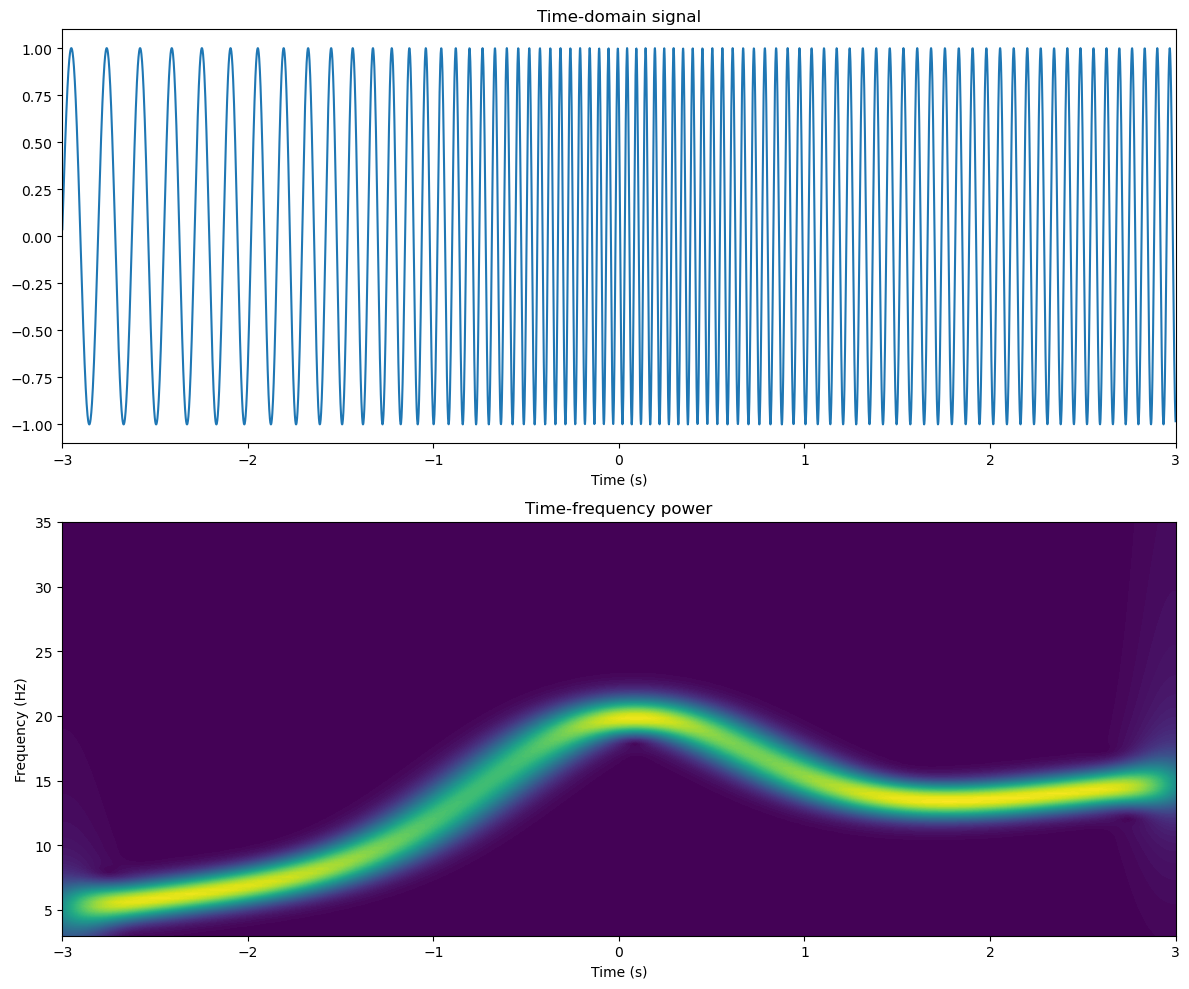

In [18]:
fig, axs = plt.subplots(2, 1, figsize=(12, 10))

axs[0].plot(t, signal)
axs[0].set_xlim(-3, 3)
axs[0].set_title("Time-domain signal")
axs[0].set_xlabel('Time (s)')

c = axs[1].contourf(t, freqs, tf, levels=100, cmap='viridis')
axs[1].set_title("Time-frequency power")
axs[1].set_ylabel('Frequency (Hz)')
axs[1].set_xlabel('Time (s)')
plt.tight_layout()
plt.show()

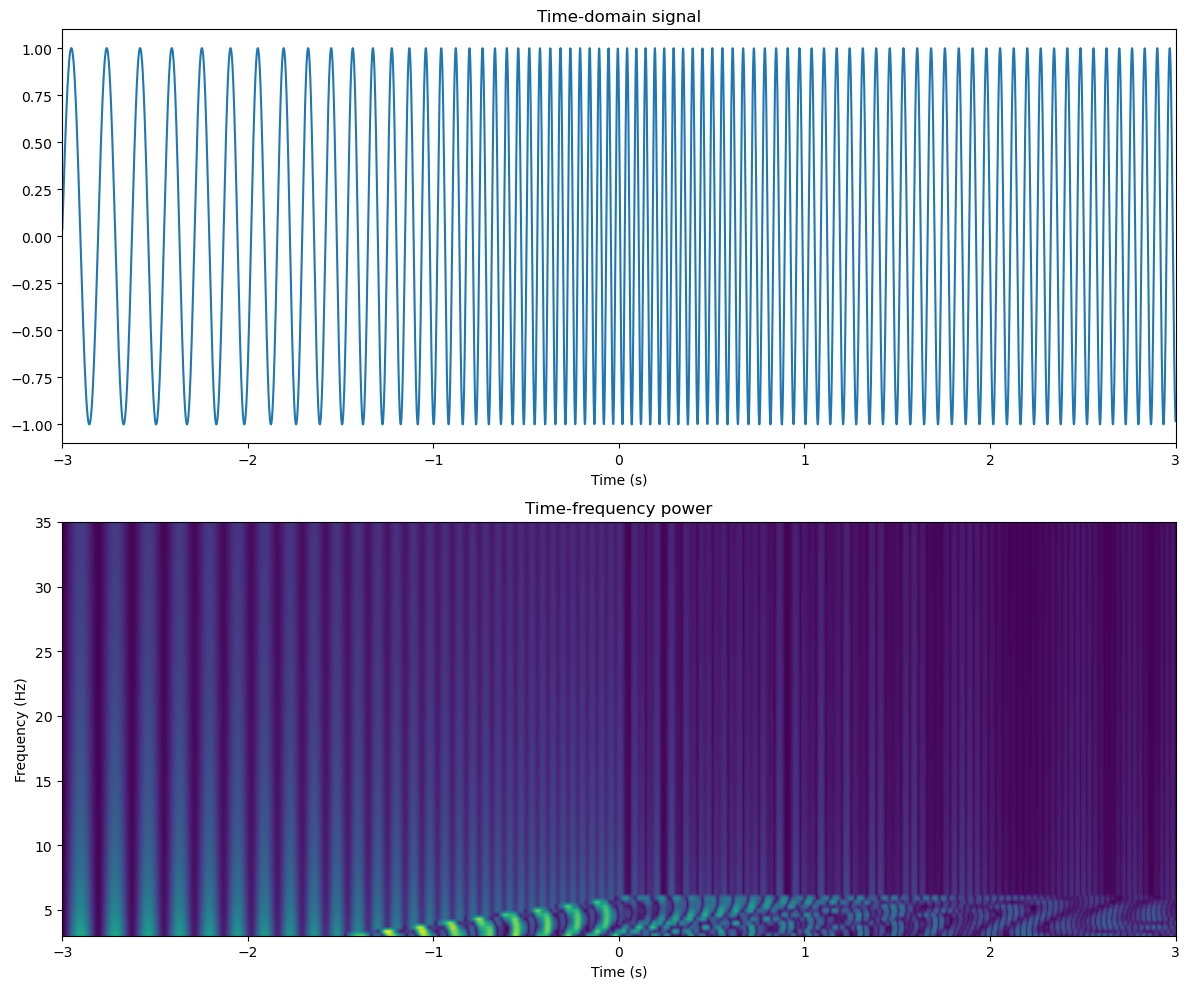

In [19]:
fig, axs = plt.subplots(2, 1, figsize=(12, 10))

axs[0].plot(t, signal)
axs[0].set_xlim(-3, 3)
axs[0].set_title("Time-domain signal")
axs[0].set_xlabel('Time (s)')

c = axs[1].contourf(t, freqs, tf2, levels=100, cmap='viridis')
axs[1].set_title("Time-frequency power")
axs[1].set_ylabel('Frequency (Hz)')
axs[1].set_xlabel('Time (s)')
plt.tight_layout()
plt.show()

**6.** Скачайте с интернета любой аудио файл, постройте для него три спектрограммы
используя вейвлет Морле, вейвлет Хаара и вейвлет “Мексиканская шляпа.

In [11]:
import librosa

In [12]:
signal, srate = librosa.load("rickroll.mp3", sr=None)
t = np.linspace(0, len(signal) / srate, num=len(signal))

freqs = np.linspace(200, 1000, 200)
tf = make_spectrogram(morlet_wavelet, t, signal, freqs, shift=1.5, sigma=0.01)

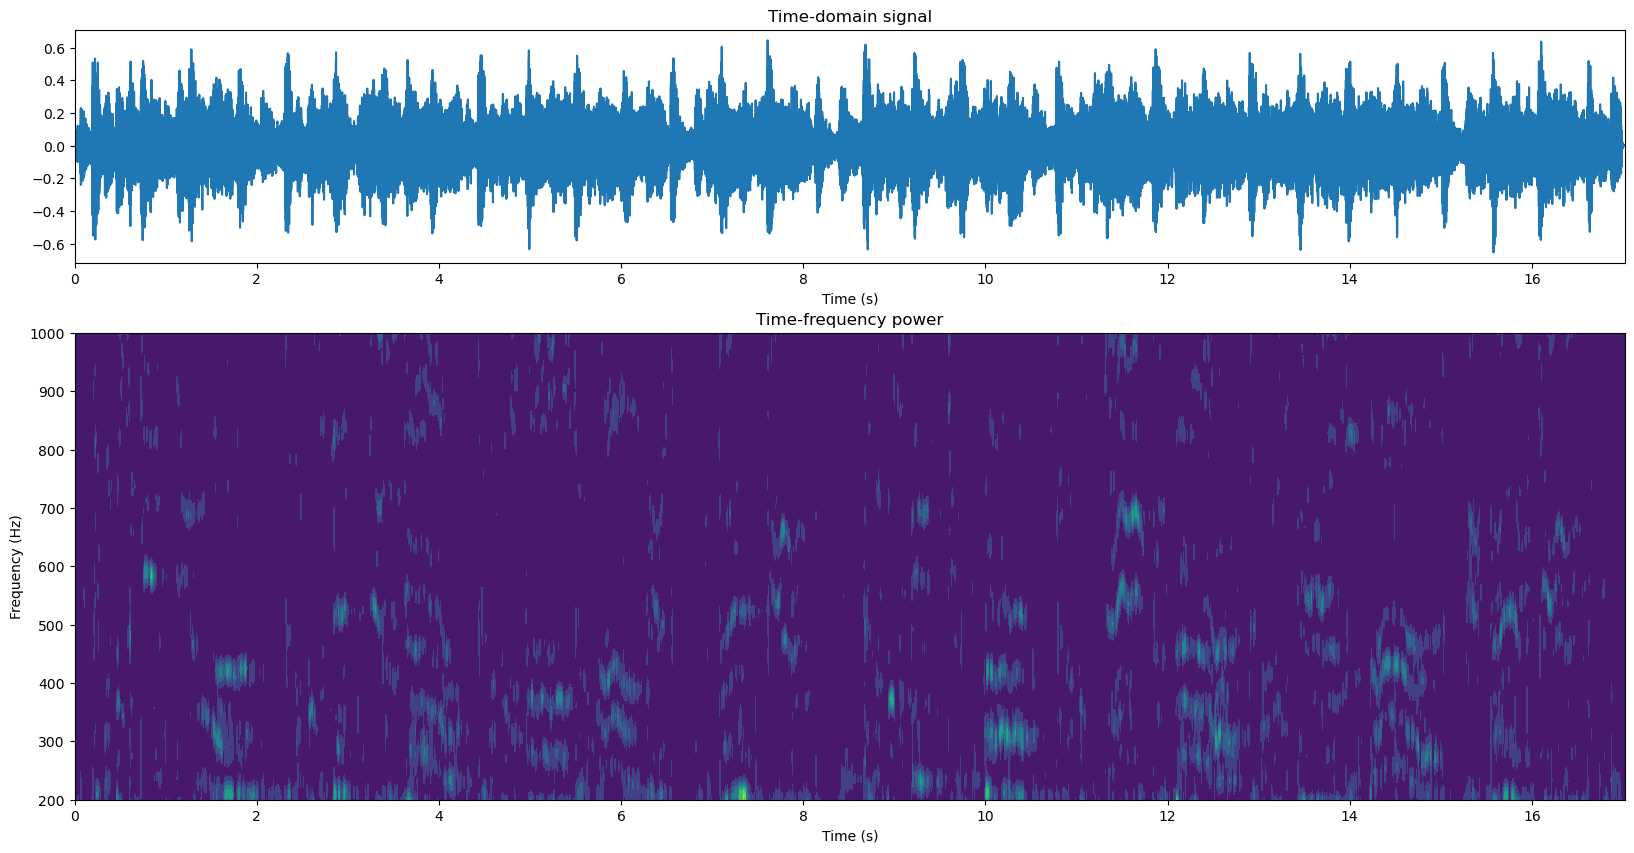

In [13]:
fig, axs = plt.subplots(2, 1, figsize=(20, 10), gridspec_kw={'height_ratios': [1, 2]})

axs[0].plot(t, signal)
axs[0].set_xlim(t[0], t[-1])
axs[0].set_title("Time-domain signal")
axs[0].set_xlabel('Time (s)')

axs[1].contourf(t, freqs, tf)
axs[1].set_title("Time-frequency power")
axs[1].set_ylabel('Frequency (Hz)')
axs[1].set_xlabel('Time (s)')
plt.show()

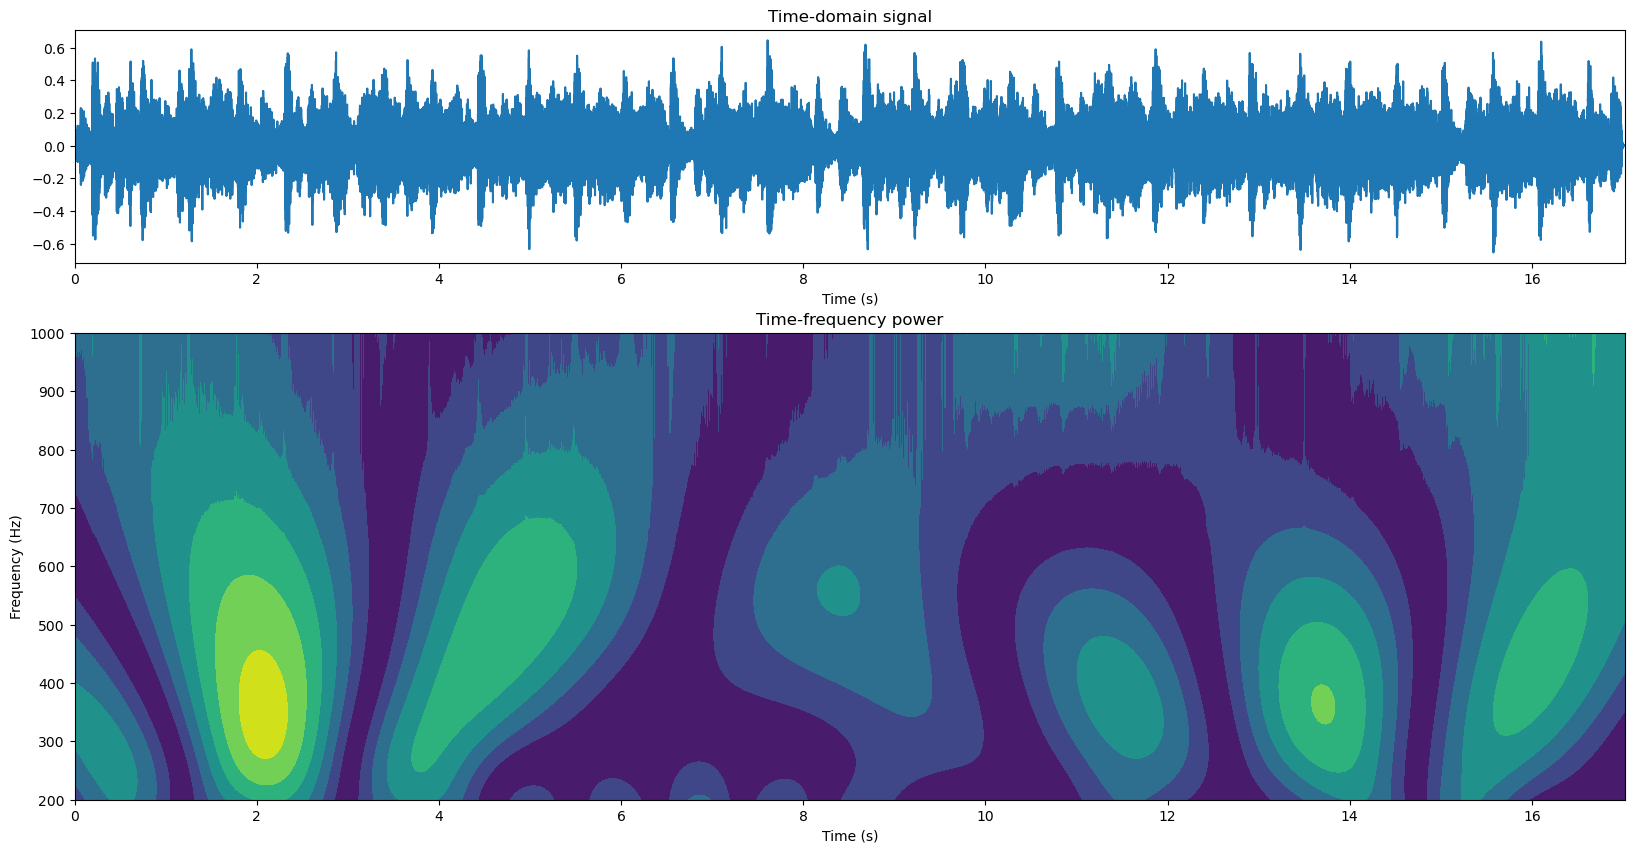

In [14]:
tf = make_spectrogram(scaled_mexican_hat_wavelet, t, signal, freqs, shift=1.5, a = 0.01)

fig, axs = plt.subplots(2, 1, figsize=(20, 10), gridspec_kw={'height_ratios': [1, 2]})

axs[0].plot(t, signal)
axs[0].set_xlim(t[0], t[-1])
axs[0].set_title("Time-domain signal")
axs[0].set_xlabel('Time (s)')

axs[1].contourf(t, freqs, tf)
axs[1].set_title("Time-frequency power")
axs[1].set_ylabel('Frequency (Hz)')
axs[1].set_xlabel('Time (s)')
plt.show()

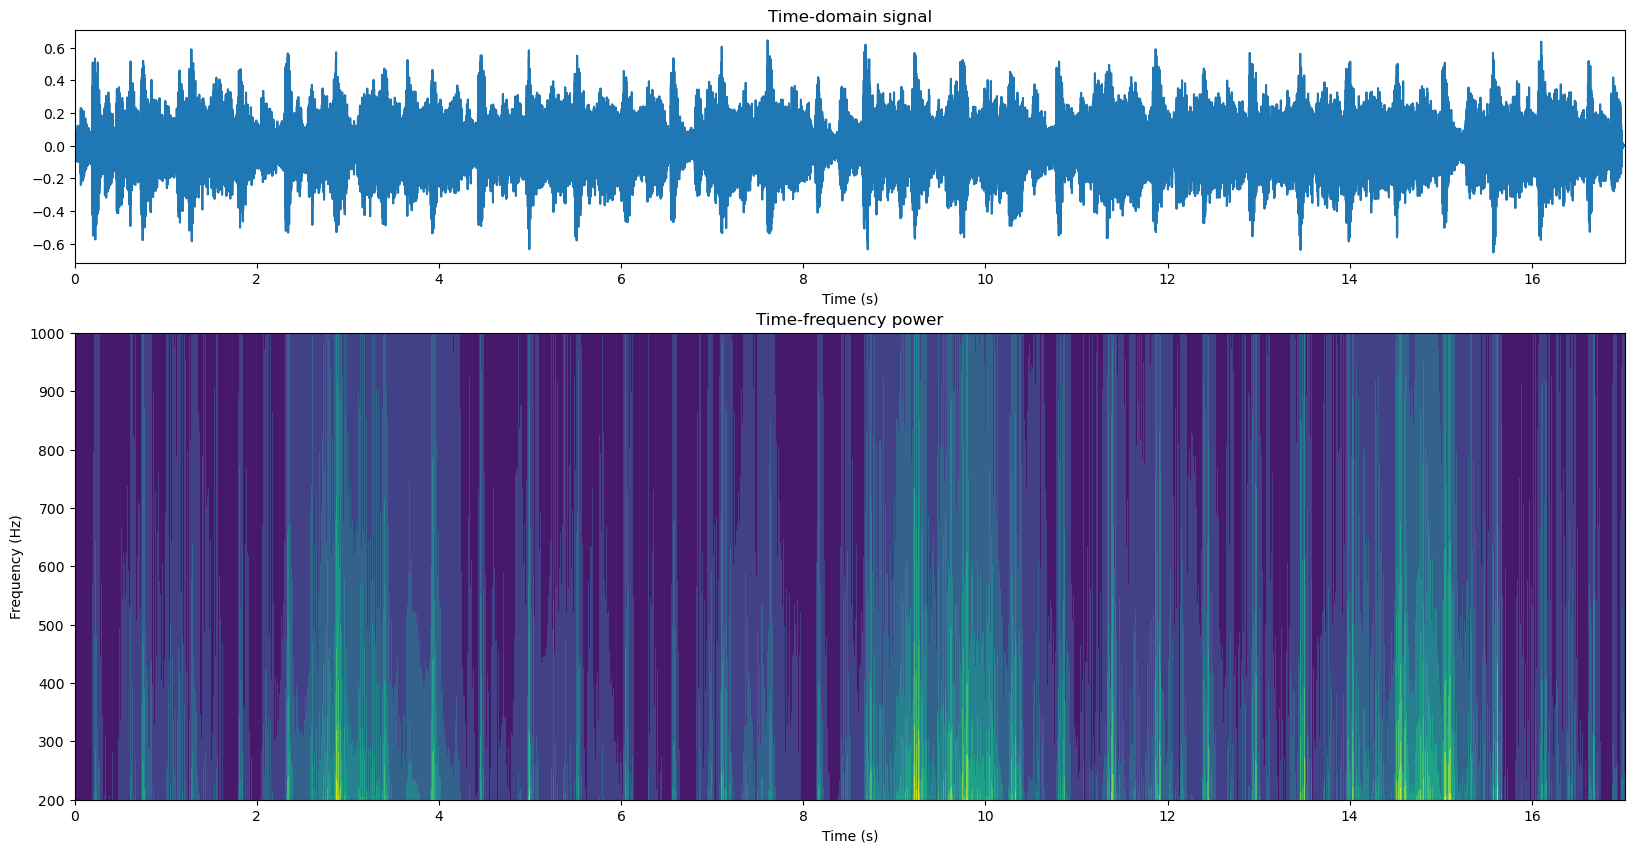

In [15]:
tf = make_spectrogram(haar_wavelet_scaled, t, signal, freqs, shift=1.5)

fig, axs = plt.subplots(2, 1, figsize=(20, 10), gridspec_kw={'height_ratios': [1, 2]})

axs[0].plot(t, signal)
axs[0].set_xlim(t[0], t[-1])
axs[0].set_title("Time-domain signal")
axs[0].set_xlabel('Time (s)')

axs[1].contourf(t, freqs, tf)
axs[1].set_title("Time-frequency power")
axs[1].set_ylabel('Frequency (Hz)')
axs[1].set_xlabel('Time (s)')
plt.show()

Убедитесь, что Ваш алгоритм работает правильно, для этого скачайте аудио звук
любой чистой ноты и постройте для него три спектрограммы используя вейвлет
Морле, вейвлет Хаара и вейвлет “Мексиканская шляпа. Например, для ноты “ля”
первой октавы основная гармоника должна соответствовать 440 Гц.

In [18]:
signal, srate = librosa.load("zvuk-notyi-lya.mp3", sr=None)
t = np.linspace(0, len(signal) / srate, num=len(signal))

freqs = np.linspace(2, 1000, 500)
tf = make_spectrogram(morlet_wavelet, t, signal, freqs, shift=1.5, sigma=0.01)

[src/libmpg123/id3.c:process_comment():584] error: No comment text / valid description?


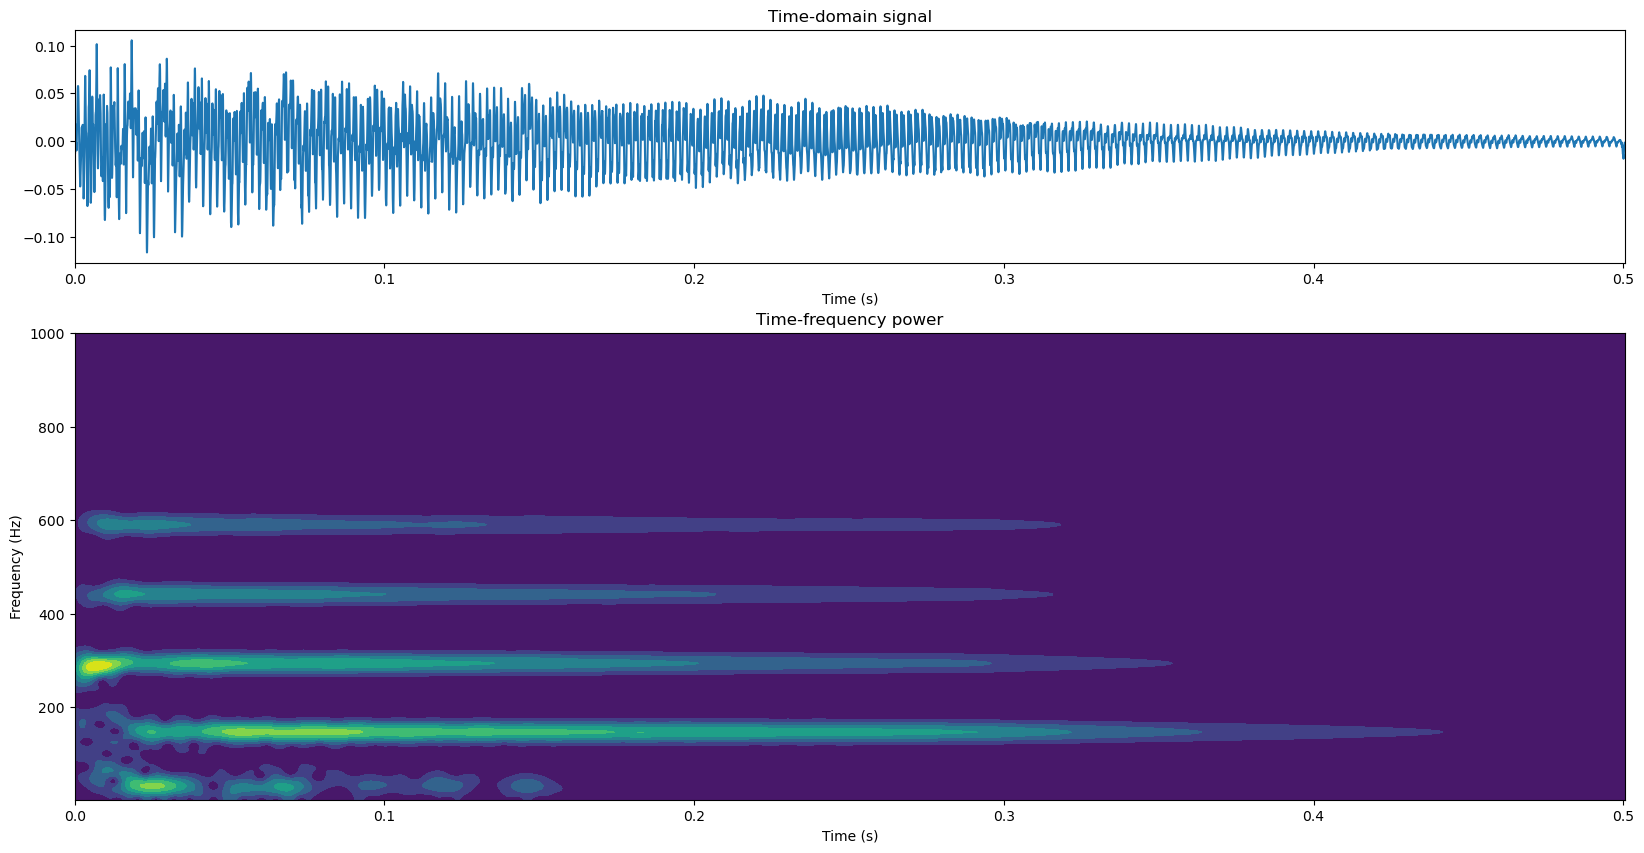

In [19]:
fig, axs = plt.subplots(2, 1, figsize=(20, 10), gridspec_kw={'height_ratios': [1, 2]})

axs[0].plot(t, signal)
axs[0].set_xlim(t[0], t[-1])
axs[0].set_title("Time-domain signal")
axs[0].set_xlabel('Time (s)')

axs[1].contourf(t, freqs, tf)
axs[1].set_title("Time-frequency power")
axs[1].set_ylabel('Frequency (Hz)')
axs[1].set_xlabel('Time (s)')
plt.show()